#Importing packages


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

#Configuring packages

In [5]:
pio.renderers.default = "notebook"
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

#importing the datasets for plotting

In [4]:
health_df = pd.read_csv("data/insurance.csv")
obesity_df = pd.read_csv("data/obesity_data.csv")
student_df = pd.read_csv("data/student.csv")

#cleaning the datasets (or just ensuring that they are clean as the author on Kaggle claims)

#Insurance Data set

In [7]:
health_df = pd.read_csv("data/insurance.csv")
print("Healthcare DataFrame Head:")
print(health_df.head())
print("\nInfo:")
print(health_df.info())
print("\nDescription:")
print(health_df.describe(include='all'))

health_df.drop_duplicates(inplace=True)
health_df.dropna(inplace=True)
health_df['sex'] = health_df['sex'].astype('category')

Healthcare DataFrame Head:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Description:
                age   sex          bmi     

#obesity dataset

In [11]:
obesity_df = pd.read_csv(r"C:\Users\opiej\DA-Mod2-WK4_Plots\data\obesity_data.csv")
print("\nObesity DataFrame Head:")
print(obesity_df.head())
print("\nInfo:")
print(obesity_df.info())
print("\nDescription:")
print(obesity_df.describe(include='all'))

obesity_df.rename(columns={'NObeyesdad': 'Obesity_Level'}, inplace=True)
for col in obesity_df.select_dtypes(include='object').columns:
    obesity_df[col] = obesity_df[col].astype('category')
obesity_df.drop_duplicates(inplace=True)
obesity_df.dropna(inplace=True)


Obesity DataFrame Head:
   Age  Gender      Height     Weight        BMI  PhysicalActivityLevel  \
0   56    Male  173.575262  71.982051  23.891783                      4   
1   69    Male  164.127306  89.959256  33.395209                      2   
2   46  Female  168.072202  72.930629  25.817737                      4   
3   32    Male  168.459633  84.886912  29.912247                      3   
4   60    Male  183.568568  69.038945  20.487903                      3   

  ObesityCategory  
0   Normal weight  
1           Obese  
2      Overweight  
3      Overweight  
4   Normal weight  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000

#student dataset


In [ ]:
student_df = pd.read_csv(r"C:\Users\opiej\DA-Mod2-WK4_Plots\data\student.csv")
student_df.columns = student_df.columns.str.strip().str.replace(" ", "_").str.replace("[^a-zA-Z0-9_]", "", regex=True)

print("\nStudent DataFrame Head:")
print(student_df.head())
print("\nInfo:")
print(student_df.info())
print("\nDescription:")
print(student_df.describe(include='all'))

print("\nStudent DataFrame Columns:")
print(student_df.columns.tolist())

cols = [col.lower() for col in student_df.columns]
student_df.columns = cols

if 'extracurricular_activities' in student_df.columns:
    student_df['extracurricular_activities'] = student_df['extracurricular_activities'].astype('category')

if 'previous_scores' in student_df.columns:
    student_df['previous_scores'] = pd.to_numeric(student_df['previous_scores'], errors='coerce')

if 'hours_studied' in student_df.columns:
    student_df['hours_studied'] = pd.to_numeric(student_df['hours_studied'], errors='coerce')

student_df.drop_duplicates(inplace=True)
drop_cols = [col for col in ['previous_scores', 'hours_studied'] if col in student_df.columns]
if drop_cols:
    student_df.dropna(subset=drop_cols, inplace=True)



Student DataFrame Head:
   Unnamed_0    Id  Student_Age     Sex High_School_Type Scholarship  \
0          0  5001           21    Male            Other         50%   
1          1  5002           20    Male            Other         50%   
2          2  5003           21    Male            State         50%   
3          3  5004           18  Female          Private         50%   
4          4  5005           22    Male          Private         50%   

  Additional_Work Sports_activity Transportation  Weekly_Study_Hours  \
0             Yes              No        Private                   0   
1             Yes              No        Private                   0   
2              No              No        Private                   2   
3             Yes              No            Bus                   2   
4              No              No            Bus                  12   

  Attendance Reading Notes Listening_in_Class Project_work Grade  
0     Always     Yes   Yes                

#Plot 1- Histogram (because I like the word and wanted to start positive) of Age using the Insurance CSV and Matplotlib

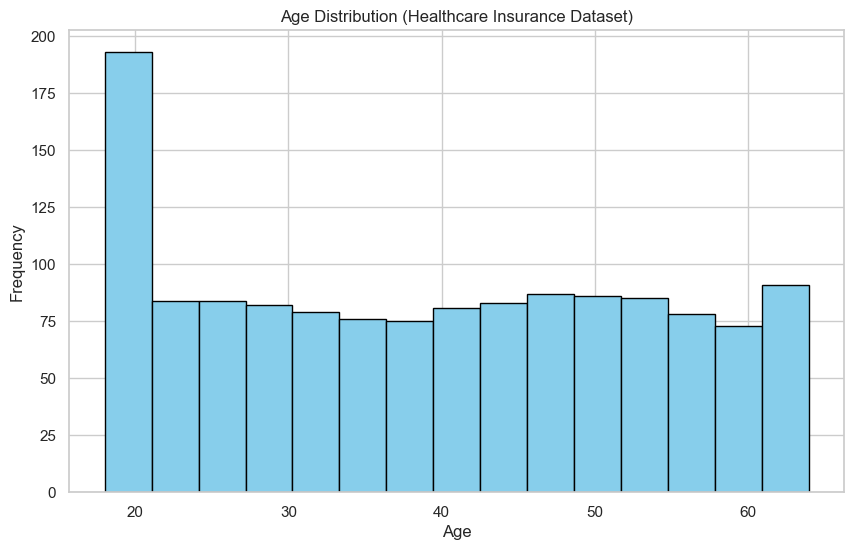

In [15]:
plt.hist(health_df['age'], bins=15, color='skyblue', edgecolor='black')
plt.title("Age Distribution (Healthcare Insurance Dataset)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#Plot 2 - Boxplot using Seaborn and the Obesity Dataset showing weight by gender

C:\Users\opiej\AppData\Local\Temp\ipykernel_18284\2121114890.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




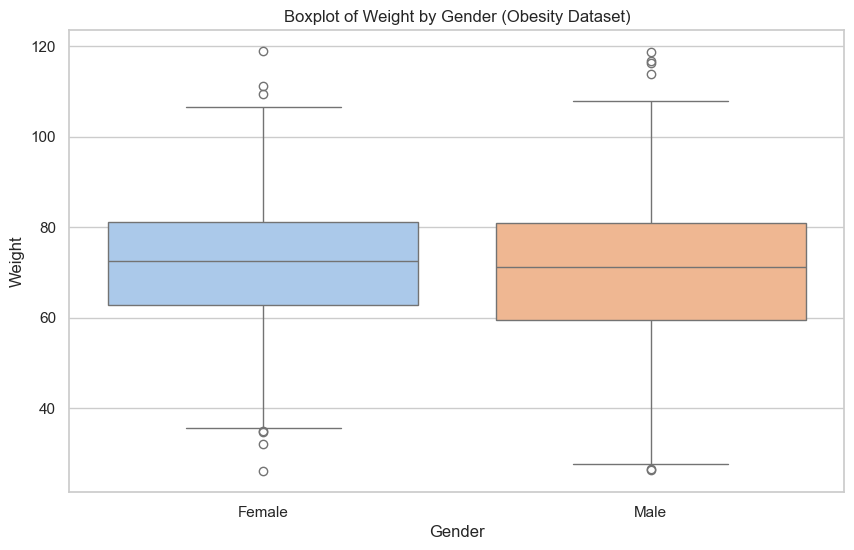

In [16]:
sns.boxplot(data=obesity_df, x="Gender", y="Weight", palette="pastel")
plt.title("Boxplot of Weight by Gender (Obesity Dataset)")
plt.show()

#Plot 3 - Heatmap using Seaborn and the Insurance CSV 

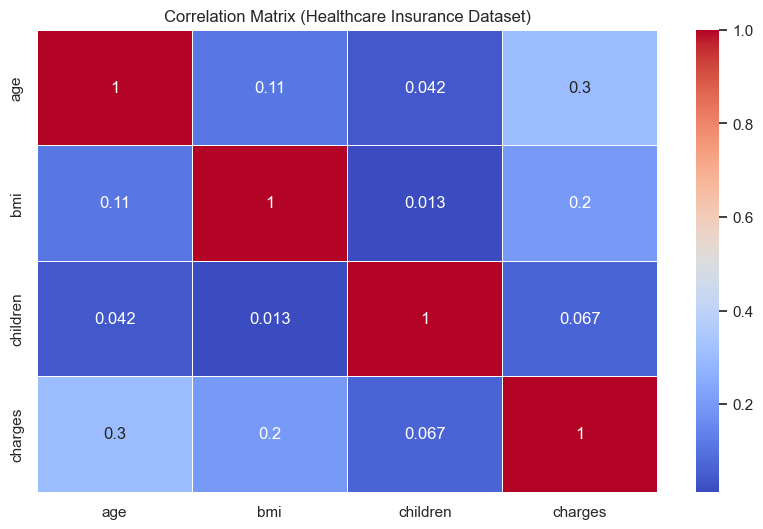

In [17]:
corr = health_df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (Healthcare Insurance Dataset)")
plt.show()


# Plot 4 - Bar Plot using Seaborn and the Student CSV

C:\Users\opiej\AppData\Local\Temp\ipykernel_18284\1070674201.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




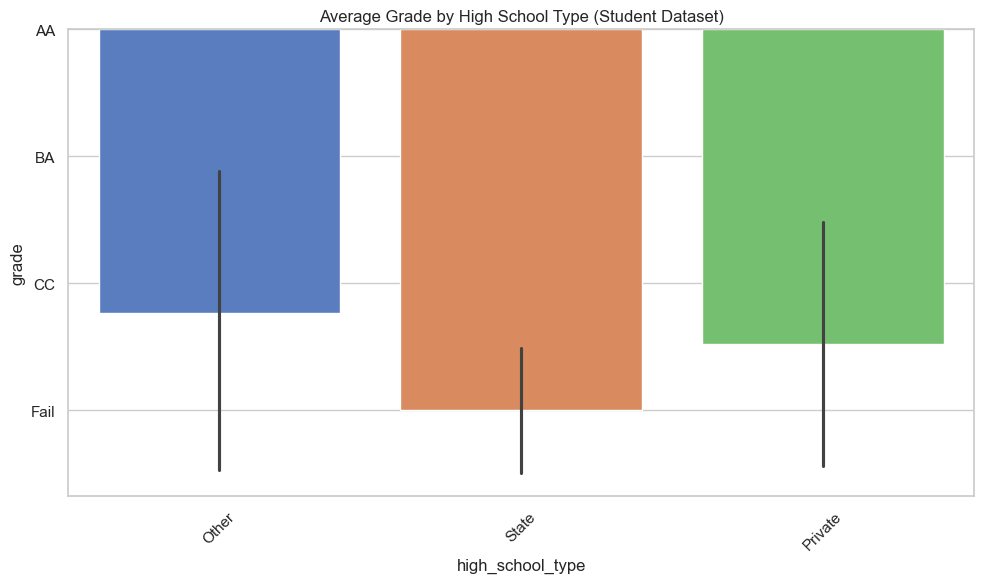

In [23]:
if 'high_school_type' in student_df.columns and 'grade' in student_df.columns:
    sns.barplot(data=student_df, x='high_school_type', y='grade', palette='muted')
    plt.title("Average Grade by High School Type (Student Dataset)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns for Plot 4 not found in student_df.")



#Plot 5 - Countplot using Seaborn and the Obesity CSV

C:\Users\opiej\AppData\Local\Temp\ipykernel_18284\488883979.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




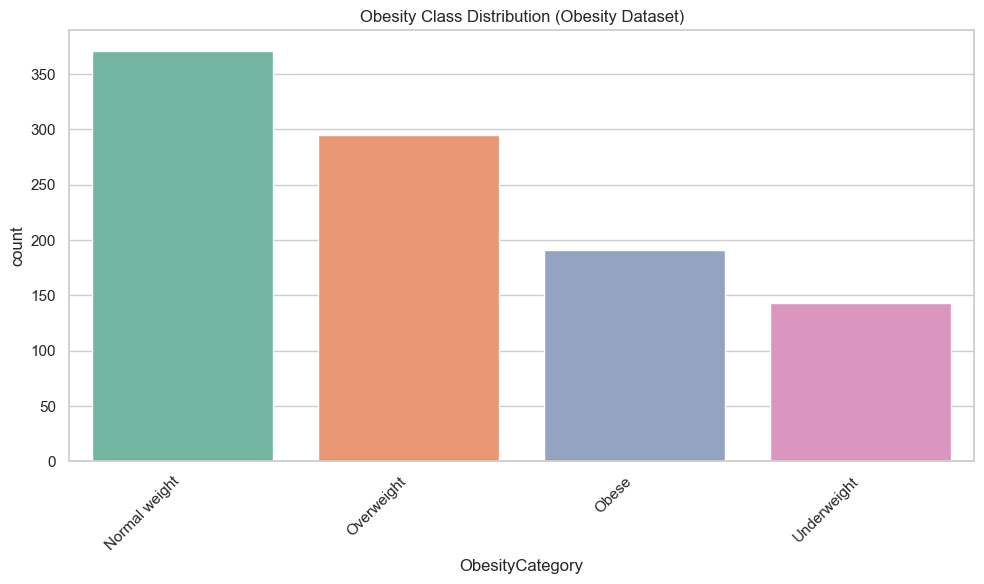

In [25]:
sns.countplot(data=obesity_df, x="Obesity_Level" if "Obesity_Level" in obesity_df.columns else obesity_df.columns[-1], 
              order=obesity_df["Obesity_Level" if "Obesity_Level" in obesity_df.columns else obesity_df.columns[-1]].value_counts().index, 
              palette="Set2")
plt.title("Obesity Class Distribution (Obesity Dataset)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


#Plot 6 Pie Chart (Had to throw one in here) using Plotly and insurance CSV.

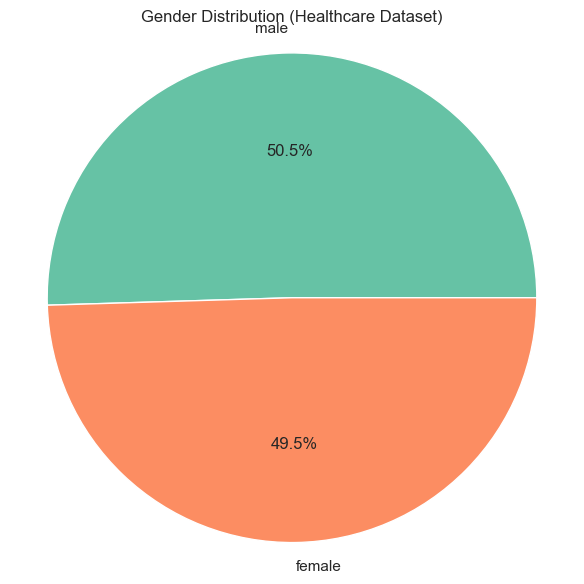

In [28]:
gender_counts = health_df['sex'].value_counts()
try:
    import plotly.io as pio
    import nbformat  # ensures compatibility with plotly in Jupyter environments
    fig = px.pie(
        names=gender_counts.index,
        values=gender_counts.values,
        title='Gender Distribution (Healthcare Dataset)'
    )
    fig.show()
except (ImportError, ValueError):
    # Fallback using matplotlib
    plt.figure(figsize=(6, 6))
    plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=plt.cm.Set2.colors)
    plt.title('Gender Distribution (Healthcare Dataset)')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
